# Async effects
This notebook shows the effects of async workers on a Federated Learning systems

In [1]:
import asyncfl as AFL
import seaborn as sns
import pandas as pd

# Define configuration

In [2]:
# Define configurations
configs = []

n = 30 # number of total clients
f = 0 # number of byzantine clients
# num_rounds = 250
repetitions = 3
num_rounds = 25
idx = 1
for n in range(3, 52, 9):
    for _rep in range(repetitions):
        configs.append({
            'position': idx,
            'name': f'afl-{n}',
        'num_rounds': num_rounds,
        'clients': {
                'client': AFL.Client,
                'client_args': {},
                # 'client_ct': list(np.random.uniform(0.9, 1.1, n - f)),
                'client_ct': [1] *  (n - f),
                'n': n,
                'f': f,
                'f_type': AFL.NGClient,
                'f_args': {'magnitude': 10},
                'f_ct': [1] * f
            },
            'server': AFL.Server,
            # 'server': AFL.BASGD,
            'server_args': {
                # 'num_buffers': 2
            },
            'dataset_name': 'mnist'
        })
        idx += 1

In [3]:
outputs = AFL.Scheduler.run_multiple(configs, pool_size=10)

  0%|          | 0/18 [00:00<?, ?it/s]

In [4]:
dfs = []
for out in outputs:
    name = out[1]['name']
    local_df = pd.DataFrame(out[0], columns=['round', 'accuracy', 'loss'])
    local_df['name'] = name
    dfs.append(local_df)

server_df = pd.concat(dfs, ignore_index=True)

<Axes: xlabel='round', ylabel='accuracy'>

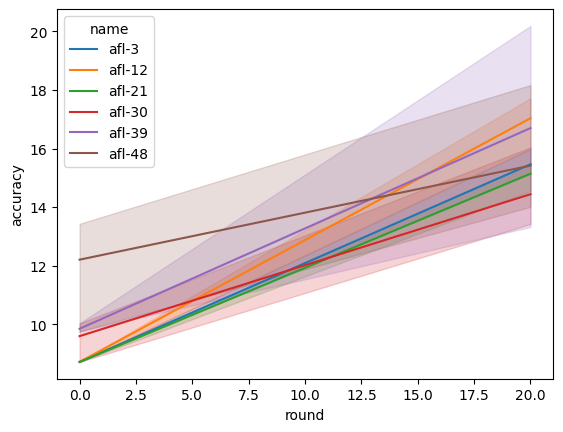

In [5]:
sns.lineplot(data=server_df, x='round', y='accuracy', hue='name')

In [16]:
from tqdm.auto import tqdm
import time

for i in tqdm(range(5), position=0, desc="i", leave=None, colour='green'):
    for j in enumerate(pbar := tqdm(range(10), position=i, desc="j", leave=None, colour='red')):
        time.sleep(0.2)
        pbar.set_description(f'Accuracy = {j}%')

i:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/10 [00:00<?, ?it/s]

j:   0%|          | 0/10 [00:00<?, ?it/s]

j:   0%|          | 0/10 [00:00<?, ?it/s]

j:   0%|          | 0/10 [00:00<?, ?it/s]

j:   0%|          | 0/10 [00:00<?, ?it/s]